In [1]:
import typing as tp
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
outputs_dir = Path('.').resolve().parent.parent.parent / "outputs"
log_file_path = outputs_dir / "2022-09-08/18-45-08/image_attention.log"

In [3]:
def load_records(log_path: Path) -> tp.List[tp.Dict[str, tp.Any]]:
    with open(log_path) as f:
        return [json.loads(line.rstrip()) for line in f]

In [4]:
log_records = load_records(log_file_path)
log_records = [record for record in log_records if record['message'] is None]

log_records_df = pd.json_normalize(log_records).drop(columns=['message', 'asctime'])
log_records_df.head()

,name,levelname,alpha,acc1,acc5,cache_strategy._target_,cache_strategy.topk,cache_strategy.cache_dataset._target_,cache_strategy.cache_dataset.dataset,cache_strategy.cache_dataset.split,cache_strategy.cache_dataset.root_path,cache_strategy.cache_dataset.shots,cache_strategy.cache_dataset.is_train,cache_strategy.cache_dataset.use_custom_preprocess,cache_value_strategy._target_,cache_weights_strategy._target_,cache_weights_strategy.beta
0,image_attention,INFO,3,57.766447,90.585748,summer_clip.clip_searcher.cache_strategy.PerGo...,2,summer_clip.utils.datasets.TipAdapterDataset,stanford_cars,train,/home/myurachinskiy/.cache,16,True,True,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,1
1,image_attention,INFO,3,59.159309,91.170252,summer_clip.clip_searcher.cache_strategy.PerGo...,4,summer_clip.utils.datasets.TipAdapterDataset,stanford_cars,train,/home/myurachinskiy/.cache,16,True,True,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,1
2,image_attention,INFO,3,61.571944,91.667703,summer_clip.clip_searcher.cache_strategy.PerGo...,8,summer_clip.utils.datasets.TipAdapterDataset,stanford_cars,train,/home/myurachinskiy/.cache,16,True,True,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,1
3,image_attention,INFO,3,63.922398,92.575550,summer_clip.clip_searcher.cache_strategy.PerGo...,16,summer_clip.utils.datasets.TipAdapterDataset,stanford_cars,train,/home/myurachinskiy/.cache,16,True,True,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,1


In [5]:
visible_params = {'alpha', 'acc1', 'acc5', 'cache_strategy.topk'}
static_columns = list(set(log_records_df.columns) - visible_params)
groups = list(log_records_df.groupby(static_columns))
print('# unique groups:', len(groups))

# unique groups: 1


In [6]:
static_values, part_df = groups[0]
static_items = dict(zip(static_columns, static_values))
static_items  # type: ignore

{'cache_strategy.cache_dataset.is_train': True,
 'cache_value_strategy._target_': 'summer_clip.clip_searcher.cache_value_strategy.HardCacheStrategy',
 'name': 'image_attention',
 'cache_strategy.cache_dataset.use_custom_preprocess': True,
 'cache_strategy.cache_dataset.root_path': '/home/myurachinskiy/.cache',
 'cache_weights_strategy._target_': 'summer_clip.clip_searcher.cache_weights_strategy.TipAdapterWeightsStrategy',
 'cache_strategy._target_': 'summer_clip.clip_searcher.cache_strategy.PerGoldClassRandomSampleStrategy',
 'cache_strategy.cache_dataset.shots': 16,
 'levelname': 'INFO',
 'cache_strategy.cache_dataset._target_': 'summer_clip.utils.datasets.TipAdapterDataset',
 'cache_weights_strategy.beta': 1,
 'cache_strategy.cache_dataset.dataset': 'stanford_cars',
 'cache_strategy.cache_dataset.split': 'train'}

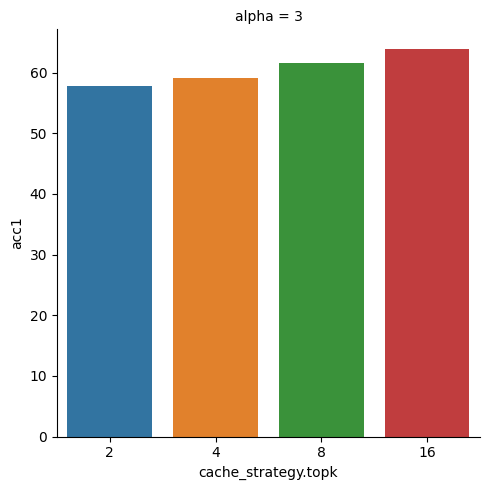

In [8]:
sns.catplot(data=part_df, x='cache_strategy.topk', y='acc1', col='alpha', kind='bar')